In [ ]:
import requests
import zipfile
import os
import io
import pandas as pd

# 1. Download the file
url = "https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip"
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# 2. Extract the ZIP file into a temporary directory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # Create a temporary directory to store the files
    extracted_path = '/tmp/synthea_sample_data'
    os.makedirs(extracted_path, exist_ok=True)
    zip_ref.extractall(extracted_path)
    print(f"Extracted to {extracted_path}")

# 3. List files extracted
extracted_files = os.listdir(extracted_path)
print("Extracted files:", extracted_files)


# 4. Create DataFrames for each CSV file
csv_files = [
    "careplans.csv",
    "conditions.csv",
    "encounters.csv",
    "medications.csv",
    "observations.csv",
    "patients.csv",
    "procedures.csv",
    "payers.csv",
    "claims.csv",
    'organizations.csv',
    'providers.csv',
]

# Dictionary to store DataFrames
dataframes_100 = {}

# Read each CSV file into a unique DataFrame
for csv_file in csv_files:
    file_path = os.path.join(extracted_path, csv_file)
    if os.path.exists(file_path):
        # Load the CSV into a Pandas DataFrame
        dataframes_100[csv_file] = pd.read_csv(file_path)
        print(f"Loaded {csv_file}")
    else:
        print(f"{csv_file} not found in the extracted files.")

Extracted to /tmp/synthea_sample_data
Extracted files: ['claims_transactions.csv', 'supplies.csv', 'imaging_studies.csv', 'payer_transitions.csv', 'patients.csv', 'careplans.csv', 'procedures.csv', 'observations.csv', 'medications.csv', 'encounters.csv', 'conditions.csv', 'allergies.csv', 'providers.csv', 'organizations.csv', 'claims.csv', 'payers.csv', 'devices.csv', 'immunizations.csv']
Loaded careplans.csv
Loaded conditions.csv
Loaded encounters.csv
Loaded medications.csv
Loaded observations.csv
Loaded patients.csv
Loaded procedures.csv
Loaded payers.csv
Loaded claims.csv
Loaded organizations.csv
Loaded providers.csv


In [ ]:
careplans_df_100 = dataframes_100.get('careplans.csv')
conditions_df_100 = dataframes_100.get('conditions.csv')
encounters_df_100 = dataframes_100.get('encounters.csv')
medications_df_100 = dataframes_100.get('medications.csv')
observations_df_100 = dataframes_100.get('observations.csv')
patients_df_100 = dataframes_100.get('patients.csv')
procedures_df_100 = dataframes_100.get('procedures.csv')
payers_df_100 = dataframes_100.get('payers.csv')
claims_df_100 = dataframes_100.get('claims.csv')
organizations_df_100 = dataframes_100.get('organizations.csv')
providers_df_100 = dataframes_100.get('providers.csv')

In [ ]:
# cleaning patient and condition files for merging
#rename Id to patient_id
patients_df_100.rename(columns={'Id': 'patient_id',}, inplace=True)
display(patients_df_100.head())

#rename patient_id to patient_id
conditions_df_100.rename(columns={'PATIENT': 'patient_id', 'ENCOUNTER': 'encounter_id', 'CODE':'condition_code' ,'DESCRIPTION': 'condition_description', 'START':'condition_start'}, inplace=True)
conditions_df_100.head()

patient_id   BIRTHDATE DEATHDATE          SSN  \
0  dbaa48b1-720a-f5f2-9360-ae6bb9321037  2022-04-19       NaN  999-46-8625   
1  8313967b-6432-89aa-090f-4d2b81558360  1989-12-26       NaN  999-31-6504   
2  c525e0a9-c37c-419c-db08-86080b4b774d  1988-07-06       NaN  999-84-5991   
3  ecb49d9e-4eb1-4743-237d-d8020ecd4f86  1943-10-22       NaN  999-81-8785   
4  8bab136f-0ae3-e4be-3ef0-62d007e0d267  2004-02-29       NaN  999-93-6499   

     DRIVERS    PASSPORT PREFIX        FIRST      MIDDLE           LAST  ...  \
0        NaN         NaN    NaN  Georgine810  Caroyln232      Jacobs452  ...   
1  S99917070  X12534338X   Mrs.   Suzanna632  Karissa612         Fay398  ...   
2  S99966682  X57704278X    Mr.   Johnson679   Warren653        Mann644  ...   
3  S99942513  X26350147X    Mr.   Freeman822   Lamont867  Schowalter414  ...   
4  S99940744  X71774583X    Mr.   Barrett790   Alfredo17   McDermott739  ...   

          CITY          STATE            COUNTY     FIPS   ZIP        LAT  \
0  Marlborough  Massachusetts  Middlesex County  25017.0  1752  42.308590   
1   Leominster  Massachusetts  Worcester County  25027.0  1420  42.615008   
2     Plymouth  Massachusetts   Plymouth County  25023.0  2360  41.896981   
3     Lawrence  Massachusetts      Essex County  25009.0  1843  42.721493   
4       Boston  Massachusetts    Suffolk County  25025.0  2111  42.311700   

         LON HEALTHCARE_EXPENSES HEALTHCARE_COVERAGE INCOME  
0 -71.567107             6002.42                0.00  60469  
1 -71.775108           257357.78           523549.41  43633  
2 -70.664510             7576.94           161526.02  12746  
3 -71.165165            22735.16           527081.23  14577  
4 -71.107352             3621.16            37226.18  24550  

[5 rows x 28 columns]

condition_start        STOP                            patient_id  \
0      2022-04-19  2023-09-26  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
1      2024-03-26  2024-03-26  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
2      2024-09-24  2024-09-24  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
3      2025-03-25  2025-03-25  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
4      2005-05-28         NaN  8313967b-6432-89aa-090f-4d2b81558360   

                           encounter_id                  SYSTEM  \
0  be04e13d-a16e-c330-3a9e-10f8db9a8aa1  http://snomed.info/sct   
1  7fe8c1c8-f019-976e-4a70-e49dbaec8cd5  http://snomed.info/sct   
2  1f72daa0-6d9d-4e3c-d317-031ab62f0431  http://snomed.info/sct   
3  12f7aeb1-70ca-ed6f-2c61-2fbb7ac53d33  http://snomed.info/sct   
4  abf41c45-cb23-5525-633b-ba6929ef0ff6  http://snomed.info/sct   

   condition_code                         condition_description  
0       314529007             Medication review due (situation)  
1       314529007             Medication review due (situation)  
2       314529007             Medication review due (situation)  
3       314529007             Medication review due (situation)  
4       197927001  Recurrent urinary tract infection (disorder)

In [ ]:
#merge patients with their conditions
patient_conditions = pd.merge(
    patients_df_100[["patient_id", "BIRTHDATE", "GENDER", "BIRTHDATE",'ZIP','INCOME']],
    conditions_df_100[["patient_id", "encounter_id","condition_code","condition_description", "condition_start"]],
    on="patient_id",
    how="left"
)

In [ ]:
#cleaning procedures file for merging

procedures_df_100.rename(columns={'PATIENT': 'patient_id', 'ENCOUNTER': 'encounter_id', 'CODE':'procedure_code' ,'DESCRIPTION': 'procedure_description', 'START':'procedure_date', 'BASE_COST':'procedure_cost', 'REASONCODE':'reason_code','REASONDESCRIPTION':'reason_description'}, inplace=True)
#need to make the date column a datetime
procedures_df_100['procedure_date'] = pd.to_datetime(procedures_df_100['procedure_date'], errors='coerce')

procedures_df_100.head()


procedure_date                  STOP  \
0 2023-09-26 00:36:40+00:00  2023-09-26T00:51:40Z   
1 2024-03-26 00:36:40+00:00  2024-03-26T00:51:40Z   
2 2024-09-24 00:36:40+00:00  2024-09-24T00:51:40Z   
3 2025-03-25 00:36:40+00:00  2025-03-25T00:51:40Z   
4 2016-10-25 18:43:10+00:00  2016-10-25T18:58:10Z   

                             patient_id                          encounter_id  \
0  dbaa48b1-720a-f5f2-9360-ae6bb9321037  8be4f777-e319-7fa6-a795-808d2cdbba0f   
1  dbaa48b1-720a-f5f2-9360-ae6bb9321037  7fe8c1c8-f019-976e-4a70-e49dbaec8cd5   
2  dbaa48b1-720a-f5f2-9360-ae6bb9321037  1f72daa0-6d9d-4e3c-d317-031ab62f0431   
3  dbaa48b1-720a-f5f2-9360-ae6bb9321037  12f7aeb1-70ca-ed6f-2c61-2fbb7ac53d33   
4  8313967b-6432-89aa-090f-4d2b81558360  0ab8c1de-e107-474e-8c68-6fe49a046020   

                   SYSTEM  procedure_code  \
0  http://snomed.info/sct       430193006   
1  http://snomed.info/sct       430193006   
2  http://snomed.info/sct       430193006   
3  http://snomed.info/sct       430193006   
4  http://snomed.info/sct       252160004   

                   procedure_description  procedure_cost  reason_code  \
0  Medication reconciliation (procedure)          239.94          NaN   
1  Medication reconciliation (procedure)          215.70          NaN   
2  Medication reconciliation (procedure)          215.70          NaN   
3  Medication reconciliation (procedure)          215.70          NaN   
4    Standard pregnancy test (procedure)         4592.67   72892002.0   

           reason_description  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4  Normal pregnancy (finding)

In [ ]:
# add in procedures that they were seen for
patient_procedures = pd.merge(
    patient_conditions,
    procedures_df_100[["patient_id", "encounter_id", "procedure_code", "procedure_description", "procedure_date","procedure_cost","reason_code","reason_description"]],
    on=["patient_id", "encounter_id"],
    how="left"
)

In [ ]:
#clean observations file for merging
observations_df_100.rename(columns={'PATIENT': 'patient_id', 'ENCOUNTER': 'encounter_id', 'CODE':'observation_code' ,'DESCRIPTION': 'observation_description', 'DATE':'observation_date', 'VALUE':'observation_value','UNITS':'observation_units'}, inplace=True)
#need to make the date column a datetime
observations_df_100['observation_date'] = pd.to_datetime(observations_df_100['observation_date'], errors='coerce')
observations_df_100.head()

observation_date                            patient_id  \
0 2022-04-19 00:36:40+00:00  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
1 2022-04-19 00:36:40+00:00  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
2 2022-04-19 00:36:40+00:00  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
3 2022-04-19 00:36:40+00:00  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
4 2022-04-19 00:36:40+00:00  dbaa48b1-720a-f5f2-9360-ae6bb9321037   

                           encounter_id     CATEGORY observation_code  \
0  be04e13d-a16e-c330-3a9e-10f8db9a8aa1  vital-signs           8302-2   
1  be04e13d-a16e-c330-3a9e-10f8db9a8aa1  vital-signs          72514-3   
2  be04e13d-a16e-c330-3a9e-10f8db9a8aa1  vital-signs          29463-7   
3  be04e13d-a16e-c330-3a9e-10f8db9a8aa1  vital-signs          77606-2   
4  be04e13d-a16e-c330-3a9e-10f8db9a8aa1  vital-signs           8289-1   

                             observation_description observation_value  \
0                                        Body Height              50.5   
1  Pain severity - 0-10 verbal numeric rating [Sc...               0.0   
2                                        Body Weight               3.6   
3                  Weight-for-length Per age and sex              36.8   
4    Head Occipital-frontal circumference Percentile              33.7   

  observation_units     TYPE  
0                cm  numeric  
1           {score}  numeric  
2                kg  numeric  
3                 %  numeric  
4                 %  numeric

In [ ]:
# Merge the most recent observations into the patient_procedures dataframe
patient_procedures_with_observations = pd.merge(
    patient_procedures,
    observations_df_100[['patient_id','encounter_id', 'observation_date', 'observation_code', 'observation_description', 'observation_value', 'observation_units']],
    on=["patient_id", "encounter_id"],
    how='left'
)
patient_procedures_with_observations.head()

patient_id   BIRTHDATE GENDER   BIRTHDATE   ZIP  \
0  dbaa48b1-720a-f5f2-9360-ae6bb9321037  2022-04-19      F  2022-04-19  1752   
1  dbaa48b1-720a-f5f2-9360-ae6bb9321037  2022-04-19      F  2022-04-19  1752   
2  dbaa48b1-720a-f5f2-9360-ae6bb9321037  2022-04-19      F  2022-04-19  1752   
3  dbaa48b1-720a-f5f2-9360-ae6bb9321037  2022-04-19      F  2022-04-19  1752   
4  dbaa48b1-720a-f5f2-9360-ae6bb9321037  2022-04-19      F  2022-04-19  1752   

   INCOME                          encounter_id  condition_code  \
0   60469  be04e13d-a16e-c330-3a9e-10f8db9a8aa1       314529007   
1   60469  be04e13d-a16e-c330-3a9e-10f8db9a8aa1       314529007   
2   60469  be04e13d-a16e-c330-3a9e-10f8db9a8aa1       314529007   
3   60469  be04e13d-a16e-c330-3a9e-10f8db9a8aa1       314529007   
4   60469  be04e13d-a16e-c330-3a9e-10f8db9a8aa1       314529007   

               condition_description condition_start  ...  \
0  Medication review due (situation)      2022-04-19  ...   
1  Medication review due (situation)      2022-04-19  ...   
2  Medication review due (situation)      2022-04-19  ...   
3  Medication review due (situation)      2022-04-19  ...   
4  Medication review due (situation)      2022-04-19  ...   

   procedure_description procedure_date procedure_cost  reason_code  \
0                    NaN            NaT            NaN          NaN   
1                    NaN            NaT            NaN          NaN   
2                    NaN            NaT            NaN          NaN   
3                    NaN            NaT            NaN          NaN   
4                    NaN            NaT            NaN          NaN   

   reason_description          observation_date observation_code  \
0                 NaN 2022-04-19 00:36:40+00:00           8302-2   
1                 NaN 2022-04-19 00:36:40+00:00          72514-3   
2                 NaN 2022-04-19 00:36:40+00:00          29463-7   
3                 NaN 2022-04-19 00:36:40+00:00          77606-2   
4                 NaN 2022-04-19 00:36:40+00:00           8289-1   

                             observation_description observation_value  \
0                                        Body Height              50.5   
1  Pain severity - 0-10 verbal numeric rating [Sc...               0.0   
2                                        Body Weight               3.6   
3                  Weight-for-length Per age and sex              36.8   
4    Head Occipital-frontal circumference Percentile              33.7   

  observation_units  
0                cm  
1           {score}  
2                kg  
3                 %  
4                 %  

[5 rows x 21 columns]

## Now we have to merge medications and encounters to the dataframe

In [ ]:
#rename columns for merging medications
medications_df_100.rename(columns={'PATIENT': 'patient_id', 'ENCOUNTER': 'encounter_id','PAYER':'payer_id', 'CODE':'medication_code' ,'DESCRIPTION': 'medication_description', 'START':'medication_start', 'TOTALCOST':'medication_cost','PAYER_COVERAGE':'payer_coverage'}, inplace=True)
medications_df_100.head()

medication_start                  STOP  \
0  2014-05-30T18:43:10Z  2015-05-25T18:43:10Z   
1  2015-05-25T18:43:10Z  2016-05-19T18:43:10Z   
2  2018-03-20T22:58:36Z  2018-03-20T22:58:36Z   
3  2020-08-31T19:05:17Z  2020-10-11T19:05:17Z   
4  2023-07-07T18:43:10Z  2024-07-01T19:04:15Z   

                             patient_id                              payer_id  \
0  8313967b-6432-89aa-090f-4d2b81558360  734afbd6-4794-363b-9bc0-6a3981533ed5   
1  8313967b-6432-89aa-090f-4d2b81558360  734afbd6-4794-363b-9bc0-6a3981533ed5   
2  8313967b-6432-89aa-090f-4d2b81558360  734afbd6-4794-363b-9bc0-6a3981533ed5   
3  8313967b-6432-89aa-090f-4d2b81558360  734afbd6-4794-363b-9bc0-6a3981533ed5   
4  8313967b-6432-89aa-090f-4d2b81558360  734afbd6-4794-363b-9bc0-6a3981533ed5   

                           encounter_id  medication_code  \
0  7d65425b-8443-cf6b-b2d7-f1422b27a28c           831533   
1  c33709c3-0608-d708-3fd5-d0b60a5c6e55           757594   
2  58e1911f-c777-7d1f-6e69-22e2f7eaf526          1535362   
3  a7e46c3f-ee94-63bb-8e5d-d4f41233ab38           849574   
4  c58138d0-0e9a-00c9-ee85-9cb789e74191           389221   

                  medication_description  BASE_COST  payer_coverage  \
0                      Errin 28 Day Pack     346.67          346.67   
1                  Jolivette 28 Day Pack     400.90           56.19   
2  sodium fluoride 0.0272 MG/MG Oral Gel     129.94            0.00   
3     Naproxen sodium 220 MG Oral Tablet     168.16            0.00   
4        Etonogestrel 68 MG Drug Implant      13.12            0.00   

   DISPENSES  medication_cost  REASONCODE      REASONDESCRIPTION  
0         12          4160.04         NaN                    NaN  
1         12          4810.80         NaN                    NaN  
2          1           129.94  66383009.0  Gingivitis (disorder)  
3          1           168.16         NaN                    NaN  
4         12           157.44         NaN                    NaN

In [ ]:
#rename columns in careplans for merging
careplans_df_100.rename(columns={'Id':'careplan_id','PATIENT': 'patient_id', 'ENCOUNTER': 'encounter_id','CODE':'careplan_code' ,'DESCRIPTION': 'careplan_description', 'START':'careplan_start',"REASONCODE":'careplan_reason_code',"REASONDESCRIPTION":'careplan_reason_description' }, inplace=True)
careplans_df_100.head()

careplan_id careplan_start        STOP  \
0  a13c3a76-fd15-e00d-a6f7-2c3735fce001     2006-02-07         NaN   
1  d7252d0d-0699-c4db-6978-b92fc97ccd13     2016-10-25  2017-05-30   
2  00fe4941-cebd-bbdc-c423-0f527155221d     2020-08-31  2020-10-11   
3  cf240348-ca10-2966-b25a-f1aad69c3731     2021-10-12  2022-05-24   
4  01bf593e-f898-3b0f-4d89-1403492059ea     2018-12-19  2019-01-28   

                             patient_id                          encounter_id  \
0  8313967b-6432-89aa-090f-4d2b81558360  359aaf0b-6ce5-8a6d-ce7d-7dca74ab8a6c   
1  8313967b-6432-89aa-090f-4d2b81558360  0ab8c1de-e107-474e-8c68-6fe49a046020   
2  8313967b-6432-89aa-090f-4d2b81558360  a7e46c3f-ee94-63bb-8e5d-d4f41233ab38   
3  8313967b-6432-89aa-090f-4d2b81558360  14813d1d-9f54-11d1-bb79-5b9201e9cc60   
4  c525e0a9-c37c-419c-db08-86080b4b774d  20b1f81d-9450-c725-8b7d-192dad4e02ea   

   careplan_code                        careplan_description  \
0      718361005  Weight management program (regime/therapy)   
1      134435003     Routine antenatal care (regime/therapy)   
2      133901003                  Burn care (regime/therapy)   
3      134435003     Routine antenatal care (regime/therapy)   
4      773513001   Physiotherapy care plan (record artifact)   

   careplan_reason_code        careplan_reason_description  
0                   NaN                                NaN  
1                   NaN                                NaN  
2           403190006.0  Epidermal burn of skin (disorder)  
3                   NaN                                NaN  
4            44465007.0         Sprain of ankle (disorder)

In [ ]:
#rename encounter columns for merging encounters
encounters_df_100.rename(columns={'Id':'encounter_id','PATIENT': 'patient_id', 'START': 'encounter_start',"PAYER":"payer_id" ,'END': 'encounter_end', 'CODE': 'encounter_code', 'DESCRIPTION': 'encounter_description', 'BASE_ENCOUNTER_COST': 'encounter_cost', 'ORGANIZATION': 'organization_id', 'PROVIDER': 'provider_id', "REASONCODE":"encounter_reason_code","REASONDESCRIPTION":"encounter_reason_description"}, inplace=True)
encounters_df_100.head()

encounter_id       encounter_start  \
0  be04e13d-a16e-c330-3a9e-10f8db9a8aa1  2022-04-19T00:36:40Z   
1  1f391129-92f6-090b-d27e-48cdb42824c2  2022-05-24T00:36:40Z   
2  e6f28acc-e581-ab40-7f30-bd9e72a18e61  2022-07-26T00:36:40Z   
3  1b1ff37c-ddf8-96c0-4aef-7b0c01b2c845  2022-09-27T00:36:40Z   
4  8538767f-d67e-976f-ec4d-5f9ade23c2c6  2022-12-27T00:36:40Z   

                   STOP                            patient_id  \
0  2022-04-19T00:51:40Z  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
1  2022-05-24T00:51:40Z  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
2  2022-07-26T00:51:40Z  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
3  2022-09-27T00:51:40Z  dbaa48b1-720a-f5f2-9360-ae6bb9321037   
4  2022-12-27T00:51:40Z  dbaa48b1-720a-f5f2-9360-ae6bb9321037   

                        organization_id                           provider_id  \
0  907b1d2f-2bf8-31b5-abc2-14d6b75faa96  22ae92ae-29c7-3d31-b626-84f83995331e   
1  907b1d2f-2bf8-31b5-abc2-14d6b75faa96  22ae92ae-29c7-3d31-b626-84f83995331e   
2  907b1d2f-2bf8-31b5-abc2-14d6b75faa96  22ae92ae-29c7-3d31-b626-84f83995331e   
3  907b1d2f-2bf8-31b5-abc2-14d6b75faa96  22ae92ae-29c7-3d31-b626-84f83995331e   
4  907b1d2f-2bf8-31b5-abc2-14d6b75faa96  22ae92ae-29c7-3d31-b626-84f83995331e   

                               payer_id ENCOUNTERCLASS  encounter_code  \
0  0133f751-9229-3cfd-815f-b6d4979bdd6a       wellness       410620009   
1  0133f751-9229-3cfd-815f-b6d4979bdd6a       wellness       410620009   
2  0133f751-9229-3cfd-815f-b6d4979bdd6a       wellness       410620009   
3  0133f751-9229-3cfd-815f-b6d4979bdd6a       wellness       410620009   
4  0133f751-9229-3cfd-815f-b6d4979bdd6a       wellness       410620009   

          encounter_description  encounter_cost  TOTAL_CLAIM_COST  \
0  Well child visit (procedure)           136.8            347.38   
1  Well child visit (procedure)           136.8            272.80   
2  Well child visit (procedure)           136.8            816.80   
3  Well child visit (procedure)           136.8            816.80   
4  Well child visit (procedure)           136.8            816.80   

   PAYER_COVERAGE  encounter_reason_code encounter_reason_description  
0             0.0                    NaN                          NaN  
1             0.0                    NaN                          NaN  
2             0.0                    NaN                          NaN  
3             0.0                    NaN                          NaN  
4             0.0                    NaN                          NaN

In [ ]:
# linking encounter info into this dataframe above
def create_patient_portfolio(patient_id):
    """Create a comprehensive patient portfolio by linking all relevant medical records."""
    # Validate patient exists
    if patient_id not in patients_df_100["patient_id"].values:
        raise ValueError(f"Patient ID {patient_id} not found in patients_df_100.")

    # Pre-filter all DataFrames for this patient (dramatically improves performance)
    patient_conditions = conditions_df_100[conditions_df_100["patient_id"] == patient_id]
    patient_procedures = procedures_df_100[procedures_df_100["patient_id"] == patient_id]
    patient_observations = observations_df_100[observations_df_100["patient_id"] == patient_id]
    patient_medications = medications_df_100[medications_df_100["patient_id"] == patient_id]
    patient_encounters = encounters_df_100[encounters_df_100["patient_id"] == patient_id]
    patient_careplans = careplans_df_100[careplans_df_100["patient_id"] == patient_id]

    # Initialize portfolio with demographics
    portfolio = {
        "demographics": patients_df_100[patients_df_100["patient_id"] == patient_id].iloc[0].to_dict(),
        "encounters": [],
        "careplans": []
    }

    # Process each encounter
    for _, encounter in patient_encounters.iterrows():
        enc_id = encounter["encounter_id"]

        encounter_entry = {
            "encounter_id": enc_id,
            "encounter_date": encounter["encounter_start"],
            "encounter_type": encounter["ENCOUNTERCLASS"],
            "encounter_code": encounter["encounter_code"],
            "encounter_description": encounter["encounter_description"],
            "encounter_cost": encounter["encounter_cost"],
            "encounter_hospital": encounter["organization_id"],
            "encounter_provider": encounter["provider_id"],
            "encounter_payer": encounter["payer_id"],
            "conditions": patient_conditions[patient_conditions["encounter_id"] == enc_id].to_dict('records'),
            "procedures": patient_procedures[patient_procedures["encounter_id"] == enc_id].to_dict('records'),
            "observations": patient_observations[patient_observations["encounter_id"] == enc_id].to_dict('records'),
            "medications": patient_medications[patient_medications["encounter_id"] == enc_id].to_dict('records')
        }
        portfolio["encounters"].append(encounter_entry)

    # Process care plans and link to conditions
    portfolio["careplans"] = patient_careplans.to_dict('records')

    for careplan in portfolio["careplans"]:
        careplan["linked_condition"] = patient_conditions[
            patient_conditions["condition_code"] == careplan["careplan_reason_code"]
        ].to_dict('records')

    return portfolio

In [ ]:
import json

all_patients = patients_df_100["patient_id"].unique()
portfolios = {pid: create_patient_portfolio(pid) for pid in all_patients}

In [ ]:
# create a new folder called /content/json folder/
import os
os.makedirs('/content/json folder/', exist_ok=True)

In [ ]:
import json

# Define the output file path

output_file_path = '/content/json folder/patient_portfolios.json'

# Convert Timestamp objects to strings for JSON serialization
def convert_timestamps(obj):
    if isinstance(obj, pd.Timestamp):
        return obj.isoformat()
    if isinstance(obj, dict):
        return {k: convert_timestamps(v) for k, v in obj.items()}
    if isinstance(obj, list):
        return [convert_timestamps(i) for i in obj]
    return obj

# Save the portfolios dictionary to a JSON file
with open(output_file_path, 'w') as json_file:
    json.dump(convert_timestamps(portfolios), json_file, indent=4)

print(f"Patient portfolios saved to {output_file_path}")

Patient portfolios saved to /content/json folder/patient_portfolios.json


In [ ]:
!pip install dash

In [115]:
import dash
from dash import dcc, html, Input, Output, dash_table
import plotly.express as px
import json
from datetime import datetime

# Initialize the Dash app
app = dash.Dash(__name__)

# Load patient data (NEED TO CHANGE PATH TO WHEREVER JSON IS SAVED)
with open('/content/json folder/patient_portfolios.json') as f:
    patient_data = json.load(f)

# App layout
app.layout = html.Div([
    html.H1("Patient Clinical Dashboard", style={'textAlign': 'center', 'marginBottom': '30px'}),

    # Patient selection dropdown
    dcc.Dropdown(
        id='patient-dropdown',
        options=[{'label': f"Patient {pid}", 'value': pid} for pid in patient_data.keys()],
        value=list(patient_data.keys())[0],
        style={'width': '50%', 'margin': '0 auto 30px'}
    ),

    # Main content container
    html.Div(id='patient-content', style={
        'display': 'grid',
        'gridTemplateColumns': 'repeat(2, 1fr)',
        'gap': '20px',
        'padding': '20px'
    })
])

# Callback to update all content based on patient selection
@app.callback(
    Output('patient-content', 'children'),
    Input('patient-dropdown', 'value')
)
def update_patient_content(patient_id):
    patient = patient_data[patient_id]

    # Calculate age
    birth_date = datetime.strptime(patient['demographics']['BIRTHDATE'], '%Y-%m-%d')
    death_date = patient['demographics'].get('DEATHDATE')
    if death_date and str(death_date).lower() not in ['', 'nan', 'none']:
      try:
          death_date = datetime.strptime(str(death_date), '%Y-%m-%d')
          age = (death_date - birth_date).days // 365
      except (ValueError, TypeError):
          age = (datetime.now() - birth_date).days // 365
    else:
      age = (datetime.now() - birth_date).days // 365

    # Calculate total costs from nested structure
    encounter_costs = sum(float(enc.get('encounter_cost',0)) for enc in patient.get('encounters', []))
    # Procedures are within encounters, so we need to:
    # 1. Iterate through each encounter
    # 2. Then iterate through each procedure in that encounter
    procedure_costs = sum(
        float(proc.get('procedure_cost', 0))
        for enc in patient.get('encounters', [])
        for proc in {p['procedure_cost']: p for p in enc.get('procedures', [])}.values()
    )
    medication_costs = sum(
        float(med.get('medication_cost',0))
        for enc in patient.get('encounters', [])
        for med in enc.get('medications', [])
    )
    total_costs = encounter_costs + procedure_costs + medication_costs


    # Create content components
    components = [
        # Demographic Info Card
        html.Div([
            html.H2("Demographics", className='section-header'),
            html.Div([
                html.P(f"Patient ID: {patient_id}"),
                html.P(f"Age: {age}"),
                html.P(f"Gender: {patient['demographics']['GENDER']}"),
                html.P(f"Birth Date: {patient['demographics']['BIRTHDATE']}"),
                html.P(f"Death Date: {patient['demographics']['DEATHDATE']}"),
                html.P(f"Zip Code: {patient['demographics']['ZIP']}"),
                html.P(f"State: {patient['demographics']['STATE']}"),
                html.P(f"County: {patient['demographics']['COUNTY']}"),
                html.P(f"City: {patient['demographics']['CITY']}"),
                html.P(f"Race: {patient['demographics']['RACE']}"),
                html.P(f"Ethnicity: {patient['demographics']['ETHNICITY']}"),
            ], className='card-content')
        ], className='card'),

        #Observations card
        html.Div([
            html.H2("Observations", className='section-header'),
            html.Div([
            html.P("Latest Observations", style={'fontSize': '1.5em'}),
            dash_table.DataTable(
                columns=[
                {'name': 'Observation', 'id': 'observation_description'},
                {'name': 'Value', 'id': 'observation_value'},
                {'name': 'Units', 'id': 'observation_units'}
                ],
                data=[
                {
                    'observation_description': obs['observation_description'],
                    'observation_value': obs['observation_value'],
                    'observation_units': obs['observation_units']
                }
                for obs in (patient.get('encounters', [])[-1].get('observations', []) if patient.get('encounters') else [])
                ],
                style_table={'height': '150px', 'overflowY': 'auto'},
                style_cell={'textAlign': 'left'}
            )
            ], className='card-content')
        ], className='card'),


        # Medications Card
        html.Div([
            html.H2("Medications", className='section-header'),
            html.Div([
                html.H3(f"{sum(len(enc.get('medications', [])) for enc in patient.get('encounters', []))}", style={'fontSize': '2em'}),
                html.P("Current Medications"),
            # Add a table of all medications and their costs
            dash_table.DataTable(
                columns=[
                    {'name': 'Medication', 'id': 'medication_description'},
                    {'name': 'Cost', 'id': 'medication_cost'}
                ],
                data=[
                    {
                        'medication_description': med['medication_description'],
                        'medication_cost': f"${float(med['medication_cost']):.2f}"
                    }
                    for enc in patient.get('encounters', [])
                    for med in enc.get('medications', [])
                ],
                style_table={'height': '150px', 'overflowY': 'auto'},
                style_cell={'textAlign': 'left'}
            )
            ], className='card-content')
        ], className='card'),

        # Encounters Card
        html.Div([
            html.H2("Encounters", className='section-header'),
            html.Div([
                html.H3(f"{len(patient.get('encounters', []))}", style={'fontSize': '2em'}),
                html.P("Medical Visits"),
                dash_table.DataTable(
                    columns=[
                        {'name': 'Date', 'id': 'encounter_date'},
                        {'name': 'Type', 'id': 'encounter_type'},
                        {'name': 'Hospital', 'id': 'encounter_hospital'},
                        {'name': 'Provider', 'id': 'encounter_provider'},
                        {'name': 'Payer', 'id': 'encounter_payer'},
                        {'name': 'Cost', 'id': 'encounter_cost'}
                    ],
                    data=[{
                        'encounter_date': enc['encounter_date'],
                        'encounter_type': enc['encounter_type'],
                        'encounter_hospital' : enc['encounter_hospital'],
                        'encounter_provider': enc['encounter_provider'],
                        'encounter_payer': enc['encounter_payer'],
                        'encounter_cost': f"${float(enc['encounter_cost']):.2f}"
                    } for enc in patient.get('encounters', [])],
                    style_table={'height': '150px', 'overflowY': 'auto'}
                )
            ], className='card-content')
        ], className='card'),

        # Care Plan Card
        html.Div([
            html.H2("Care Plan", className='section-header'),
            html.Div([
            html.Ul([
                html.Li(plan['careplan_description']) for plan in patient.get('careplans', [])
            ]) if patient.get('careplans') else html.P("No active care plans")
            ], style={'marginTop': '20px'}, className='card-content')
        ], className='card'),


        # Conditions Card
        html.Div([
            html.H2("Conditions", className='section-header'),
            html.Div([
            dash_table.DataTable(
                columns=[
                {'name': 'Condition', 'id': 'condition_description'},
                {'name': 'Encounter Date', 'id': 'encounter_date'}
                ],
                data=[
                {
                    'condition_description': cond['condition_description'],
                    'encounter_date': enc['encounter_date']
                }
                for enc in patient.get('encounters', [])
                for cond in enc.get('conditions', [])
                ],
                style_table={'height': '150px', 'overflowY': 'auto'},
                style_cell={'textAlign': 'left'}
            )
            ], className='card-content')
        ], className='card'),


        # Financial Summary Card
        html.Div([
            html.H2("Financial Summary", className='section-header'),
            html.Div([
                html.H3(f"${total_costs:.2f}", style={'fontSize': '2em'}),
                html.P("Total Healthcare Costs"),
                html.Div([
                    html.P(f"Encounters: ${encounter_costs:.2f}"),
                    html.P(f"Procedures: ${procedure_costs:.2f}"),
                    html.P(f"Medications: ${medication_costs:.2f}")
                ], style={'marginTop': '15px'})
            ], className='card-content')
        ], className='card')
    ]

    return components

# CSS styles
app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
})

# Add custom styles
app.layout.children.append(html.Link(
    rel='stylesheet',
    href='https://codepen.io/chriddyp/pen/bWLwgP.css'
))

# Inline custom styles
custom_styles = '''
    .card {
        border: 1px solid #ddd;
        border-radius: 8px;
        padding: 15px;
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        background: white;
    }
    .section-header {
        color: #2c3e50;
        border-bottom: 1px solid #eee;
        padding-bottom: 10px;
        margin-top: 0;
    }
    .card-content {
        padding: 10px;
    }
'''
app.layout.children.append(html.Div([
    dcc.Markdown(f'<style>{custom_styles}</style>', dangerously_allow_html=True)
]))

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [109]:
# prompt: show me the json file for patient 28f969b1-98bb-c124-8dd0-d29beb5fa24b
import json
with open('/content/json folder/patient_portfolios.json', 'r') as f:
    data = json.load(f)

patient_id = "28f969b1-98bb-c124-8dd0-d29beb5fa24b"
if patient_id in data:
    patient_data = data[patient_id]
    print(json.dumps(patient_data, indent=4))
else:
    print(f"Patient with ID '{patient_id}' not found in the JSON data.")


{
    "demographics": {
        "patient_id": "28f969b1-98bb-c124-8dd0-d29beb5fa24b",
        "BIRTHDATE": "1916-02-14",
        "DEATHDATE": "2002-03-17",
        "SSN": "999-41-4283",
        "DRIVERS": "S99989595",
        "PASSPORT": "X22053871X",
        "PREFIX": "Mrs.",
        "FIRST": "Arnetta705",
        "MIDDLE": NaN,
        "LAST": "Lang846",
        "SUFFIX": NaN,
        "MAIDEN": "Reinger292",
        "MARITAL": "D",
        "RACE": "asian",
        "ETHNICITY": "nonhispanic",
        "GENDER": "F",
        "BIRTHPLACE": "Chongqing  Chongqing Municipality  CN",
        "ADDRESS": "1003 Koepp Trace",
        "CITY": "Amherst Center",
        "STATE": "Massachusetts",
        "COUNTY": "Hampshire County",
        "FIPS": NaN,
        "ZIP": 0,
        "LAT": 42.39738183828374,
        "LON": -72.46862896837278,
        "HEALTHCARE_EXPENSES": 1001858.83,
        "HEALTHCARE_COVERAGE": 1246729.69,
        "INCOME": 63412
    },
    "encounters": [
        {
            "en

## Clustering Patients together

In [229]:
def extract_features(patient_data):
    features = []

    # Assuming patient_data is a list of patient records
    for patient in patient_data:  # Changed from .items() iteration
        # Check if patient record is a dictionary
        if not isinstance(patient, dict):
            print(f"Skipping invalid patient record: {patient}")
            continue

        # Safely access demographics
        demographics = patient.get('demographics', {})

        # Skip if no demographics
        if not demographics:
            print(f"Skipping patient - missing demographics")
            continue

        # Age calculation
        try:
            birth_date = pd.to_datetime(demographics.get('BIRTHDATE'))
            death_date = demographics.get('DEATHDATE')

            if death_date and str(death_date).lower() not in ['', 'nan', 'none']:
                age = (pd.to_datetime(death_date) - birth_date).days // 365
            else:
                age = (pd.to_datetime('today') - birth_date).days // 365
        except:
            age = None  # or set a default age

        # Gender with default
        gender = 1 if str(demographics.get('GENDER', '')).lower() in ['male', 'm'] else 0

        # Initialize counters
        condition_count = 0
        med_count = 0
        encounter_count = len(patient.get('encounters', []))
        total_cost = 0
        unique_conditions = set()
        unique_meds = set()
        condition_code_to_desc = {}

        # Process each encounter
        for encounter in patient.get('encounters', []):
            # Sum encounter cost
            total_cost += float(encounter.get('encounter_cost', 0))

            # Count procedures and their costs
            for procedure in encounter.get('procedures', []):
                total_cost += float(procedure.get('TOTALCOST', 0))

            # Collect conditions (avoid duplicates)
            for condition in encounter.get('conditions', []):
                unique_conditions.add(condition.get('condition_code', 'Unknown'))
                code = condition.get('condition_code')
                desc = condition.get('condition_description')
                if code and desc:
                  condition_code_to_desc[code] = desc

            # Count medications (avoid duplicates)
            for medication in encounter.get('medications', []):
                unique_meds.add(medication.get('medication_code', 'Unknown'))

        # Get final counts
        condition_count = len(unique_conditions)
        med_count = len(unique_meds)

        # Get most frequent condition (example additional feature)
        top_condition = max(
            [(condition_code_to_desc.get(cond, cond), list(unique_conditions).count(cond)) for cond in unique_conditions],
            key=lambda x: x[1],
            default=("No conditions", 0)
        )[0]


        def extract_vitals(patient):
            vitals = {
                'blood_pressure_sys': None,  # Systolic (8480-6)
                'blood_pressure_dia': None,  # Diastolic (8462-4)
                'mean_blood_pressure': None,  # (8478-0)
                'bmi': None,  # (39156-5)
                'sys_dia_ratio': None
            }

            # Track all measurements to get most recent
            bp_readings = []
            bmi_readings = []

            for encounter in patient.get('encounters', []):
                for observation in encounter.get('observations', []):
                    code = observation.get('observation_code')
                    value = observation.get('observation_value')

                    if not code or not value:
                        continue

                    # Blood pressure measurements
                    if code == '8480-6':  # Systolic
                        vitals['blood_pressure_sys'] = float(value)
                    elif code == '8462-4':  # Diastolic
                        vitals['blood_pressure_dia'] = float(value)
                    elif code == '8478-0':  # Mean arterial
                        vitals['mean_blood_pressure'] = float(value)
                    elif code == '39156-5':  # BMI
                        vitals['bmi'] = float(value)

            # Calculate ratio if both systolic and diastolic exist
            if vitals['blood_pressure_sys'] and vitals['blood_pressure_dia']:
                vitals['sys_dia_ratio'] = vitals['blood_pressure_sys'] / vitals['blood_pressure_dia']

            return vitals

        vitals = extract_vitals(patient)


        features.append({
            'patient_id': demographics.get('patient_id'),
            'age': age,
            'gender': gender,
            'systolic_bp': vitals['blood_pressure_sys'],
            'diastolic_bp': vitals['blood_pressure_dia'],
            'bmi': vitals['bmi'],
            'condition_count': condition_count,
            'medication_count': med_count,
            'encounter_count': encounter_count,
            'total_cost': total_cost,
            'top_condition': top_condition
        })

    return pd.DataFrame(features)

In [230]:
# prompt: now run the extract features on my json file

# Assuming 'data' is already loaded from the JSON file as in your previous code
features_df = extract_features(list(data.values())) # Pass the list of patient values
display(features_df)


patient_id  age  gender  systolic_bp  \
0    dbaa48b1-720a-f5f2-9360-ae6bb9321037    3       0        130.0   
1    8313967b-6432-89aa-090f-4d2b81558360   35       0        116.0   
2    c525e0a9-c37c-419c-db08-86080b4b774d   36       1        113.0   
3    ecb49d9e-4eb1-4743-237d-d8020ecd4f86   81       1        103.0   
4    8bab136f-0ae3-e4be-3ef0-62d007e0d267   21       1        116.0   
..                                    ...  ...     ...          ...   
124  a770b4ba-63c9-d1c5-5177-cd9f71e91e1e   91       1        129.0   
125  19044bac-e685-a09d-2c79-769263eaac4e   84       1        133.0   
126  79c6eef9-ac4e-98f1-0ab8-ca98b87342e9   97       1        107.0   
127  caef50a6-4182-524f-2a42-e3d8499f1a06   72       1        123.0   
128  59be6f33-cd77-774a-8e0f-3286eff96d1c   87       1        106.0   

     diastolic_bp   bmi  condition_count  medication_count  encounter_count  \
0            70.0  16.2                1                 0               11   
1            74.0  31.1               14                 5               46   
2            93.0  32.0               26                 7               17   
3            77.0  28.2               31                10              103   
4            81.0  20.2               10                 0               12   
..            ...   ...              ...               ...              ...   
124          82.0  27.3               50                18              490   
125         108.0  27.9               46                12              116   
126          90.0  27.8               27                 9               38   
127          76.0  28.1               26                15               41   
128          72.0  27.7               27                 5               52   

     total_cost                                 top_condition  
0       1504.80             Medication review due (situation)  
1       6098.15                Part-time employment (finding)  
2       1883.11                          Sinusitis (disorder)  
3      10514.43                    Impacted molars (disorder)  
4       1487.85           Risk activity involvement (finding)  
..          ...                                           ...  
124    56690.48  History of myocardial infarction (situation)  
125    11718.29  History of myocardial infarction (situation)  
126     4628.17           History of appendectomy (situation)  
127     4777.77                  Not in labor force (finding)  
128     5835.23           History of appendectomy (situation)  

[129 rows x 11 columns]

In [231]:
# Define your clusters with numerical codes
condition_clusters = {
    1: 'Cardiometabolic',  # Cluster 1
    2: 'Respiratory_Infectious',  # Cluster 2
    3: 'Musculoskeletal_Dental',  # Cluster 3
    4: 'Behavioral_Neurological',  # Cluster 4
    5: 'Social_Administrative'  # Cluster 5
}

# Create reverse mapping (condition name -> cluster number)
condition_to_cluster_num = {
    # Cluster 1: Cardiometabolic
    'Essential hypertension (disorder)': 1,
    'Prediabetes (finding)': 1,
    'Body mass index 30+ - obesity (finding)': 1,
    'History of myocardial infarction (situation)': 1,

    # Cluster 2: Respiratory/Infectious
    'Sinusitis (disorder)': 2,
    'Viral sinusitis (disorder)': 2,
    'Acute viral pharyngitis (disorder)': 2,
    'Acute bronchitis (disorder)': 2,
    'Streptococcal sore throat (disorder)': 2,
    'Suspected disease caused by Severe acute respiratory coronavirus 2 (situation)': 2,

    # Cluster 3: Musculoskeletal/Dental
    'Impacted molars (disorder)': 3,
    'Gingivitis (disorder)': 3,
    'Fracture of bone (disorder)': 3,
    'Osteoarthritis of hip (disorder)': 3,

    # Cluster 4: Behavioral/Neurological
    'Alcoholism (disorder)': 4,
    'Unhealthy alcohol drinking behavior (finding)': 4,
    'Seizure disorder (disorder)': 4,
    'Loss of taste (finding)': 4,

    # Cluster 5: Social/Administrative
    'Medication review due (situation)': 5,
    'Part-time employment (finding)': 5,
    'Not in labor force (finding)': 5,
    'Housing unsatisfactory (finding)': 5,
    'Risk activity involvement (finding)': 5,
    'History of appendectomy (situation)': 5,
    'Past pregnancy history of miscarriage (situation)': 5,
    'Polyp of colon (disorder)': 5
}

features_df['condition_cluster'] = features_df['top_condition'].map(condition_to_cluster_num)



In [232]:
features_df

patient_id  age  gender  systolic_bp  \
0    dbaa48b1-720a-f5f2-9360-ae6bb9321037    3       0        130.0   
1    8313967b-6432-89aa-090f-4d2b81558360   35       0        116.0   
2    c525e0a9-c37c-419c-db08-86080b4b774d   36       1        113.0   
3    ecb49d9e-4eb1-4743-237d-d8020ecd4f86   81       1        103.0   
4    8bab136f-0ae3-e4be-3ef0-62d007e0d267   21       1        116.0   
..                                    ...  ...     ...          ...   
124  a770b4ba-63c9-d1c5-5177-cd9f71e91e1e   91       1        129.0   
125  19044bac-e685-a09d-2c79-769263eaac4e   84       1        133.0   
126  79c6eef9-ac4e-98f1-0ab8-ca98b87342e9   97       1        107.0   
127  caef50a6-4182-524f-2a42-e3d8499f1a06   72       1        123.0   
128  59be6f33-cd77-774a-8e0f-3286eff96d1c   87       1        106.0   

     diastolic_bp   bmi  condition_count  medication_count  encounter_count  \
0            70.0  16.2                1                 0               11   
1            74.0  31.1               14                 5               46   
2            93.0  32.0               26                 7               17   
3            77.0  28.2               31                10              103   
4            81.0  20.2               10                 0               12   
..            ...   ...              ...               ...              ...   
124          82.0  27.3               50                18              490   
125         108.0  27.9               46                12              116   
126          90.0  27.8               27                 9               38   
127          76.0  28.1               26                15               41   
128          72.0  27.7               27                 5               52   

     total_cost                                 top_condition  \
0       1504.80             Medication review due (situation)   
1       6098.15                Part-time employment (finding)   
2       1883.11                          Sinusitis (disorder)   
3      10514.43                    Impacted molars (disorder)   
4       1487.85           Risk activity involvement (finding)   
..          ...                                           ...   
124    56690.48  History of myocardial infarction (situation)   
125    11718.29  History of myocardial infarction (situation)   
126     4628.17           History of appendectomy (situation)   
127     4777.77                  Not in labor force (finding)   
128     5835.23           History of appendectomy (situation)   

     condition_cluster  
0                    5  
1                    5  
2                    2  
3                    3  
4                    5  
..                 ...  
124                  1  
125                  1  
126                  5  
127                  5  
128                  5  

[129 rows x 12 columns]

In [233]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical features (modify based on your actual columns)
X = features_df[['age','gender','systolic_bp','diastolic_bp','bmi','condition_count', 'medication_count',
               'encounter_count', 'total_cost']]

# Handle missing values if any
X = X.fillna(X.mean())

# Standardize features (crucial for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

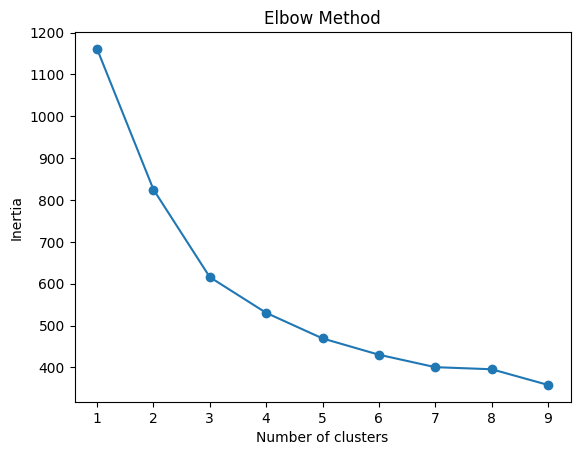

In [234]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [235]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters back to your dataframe
features_df['cluster'] = clusters

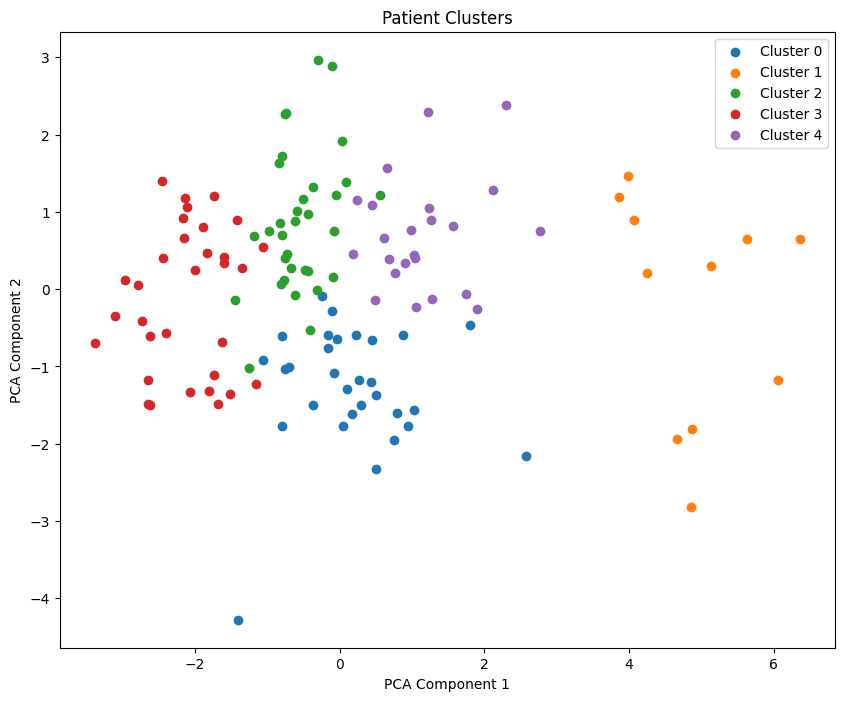

In [239]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
for cluster in range(5):
    plt.scatter(
        X_pca[clusters == cluster, 0],
        X_pca[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Patient Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


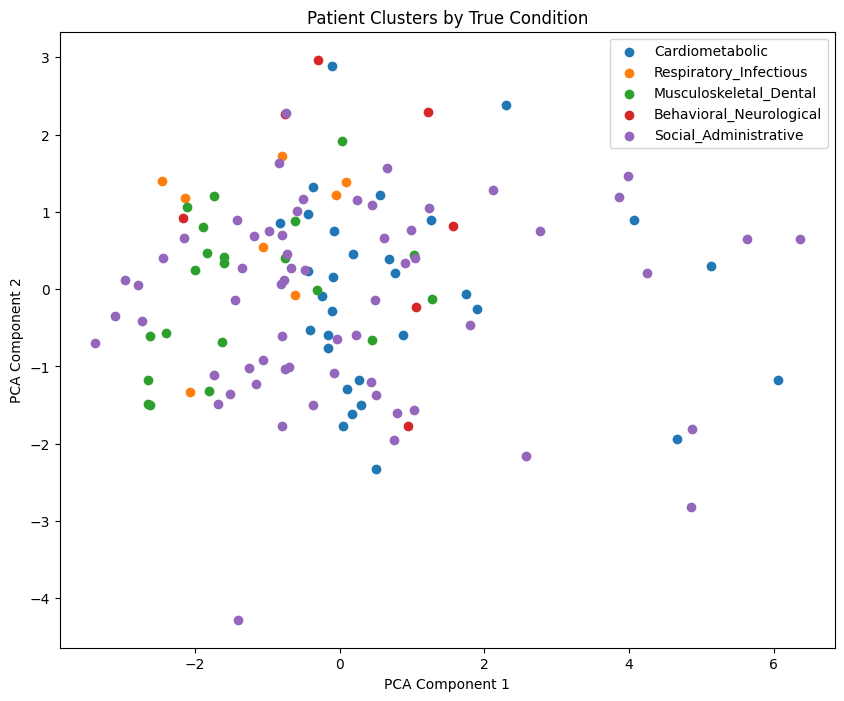

In [240]:
# prompt: now plot the same PCA components but color the points by their true clustered conditions

import matplotlib.pyplot as plt

# Assuming X_pca and features_df are already defined from previous code

plt.figure(figsize=(10, 8))
for cluster_num, cluster_name in condition_clusters.items():
    cluster_indices = features_df[features_df['condition_cluster'] == cluster_num].index
    if len(cluster_indices) > 0:
      plt.scatter(
          X_pca[cluster_indices, 0],
          X_pca[cluster_indices, 1],
          label=cluster_name
      )
plt.title('Patient Clusters by True Condition')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [237]:
# prompt: how do i test the k-means clusters to the actual spread of the clusters_to_conditions column?

import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# ... (your existing code) ...

# Calculate evaluation metrics
ari = adjusted_rand_score(features_df['condition_cluster'], features_df['cluster'])
nmi = normalized_mutual_info_score(features_df['condition_cluster'], features_df['cluster'])

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Create a cross-tabulation to visualize the cluster mapping
cluster_mapping = pd.crosstab(features_df['cluster'], features_df['condition_cluster'])
print("\nCluster Mapping:")
cluster_mapping


Adjusted Rand Index (ARI): 0.03268612688964687
Normalized Mutual Information (NMI): 0.14572047529695978

Cluster Mapping:


condition_cluster   1  2   3  4   5
cluster                            
0                  11  0   1  1  17
1                   4  0   0  0   7
2                   9  4   4  2  14
3                   0  4  14  1  13
4                   7  0   2  3  11